# <center>Name: Neelanjan Dutta</center>

# <center>REGISTRATION NUMBER: 2448040</center>

# <center>LAB3: NEURAL NETWORKS AND DEEP LEARNING</center>

**Program #1: Implementing Smart Farming Decisions Using MADALINE Neural Network: Irrigation and Equipment Deployment Automation.**

In modern agriculture, optimizing water usage and resource deployment is essential for sustainability and efficiency. Smart farms are increasingly equipped with IoT-based sensors that collect real-time environmental and operational data. Two critical decisions that impact farm productivity and resource conservation are: <br>
+ 1. Irrigation Decision – Whether to turn irrigation ON or OFF, based on soil
moisture, weather conditions, and crop water needs.
+ 2. Farm Equipment Deployment – Whether to send tractors or harvesters to
the field, based on soil condition, crop readiness, and weather forecast.<br>

Implement a MADALINE (Multiple ADAptive LInear NEuron) Neural Network to automate both decisions using sensor data.

Enter number of synthetic rows to generate (e.g., 200): 300
Enter number of training epochs (e.g., 50): 100
Enter learning rate (e.g., 0.05): 0.001

Training MADALINE for IRRIGATION
Early stopping at epoch 23

Training MADALINE for EQUIPMENT DEPLOYMENT
Early stopping at epoch 15

FINAL RESULTS:
Irrigation Accuracy: 0.767
Equipment Deployment Accuracy: 0.800


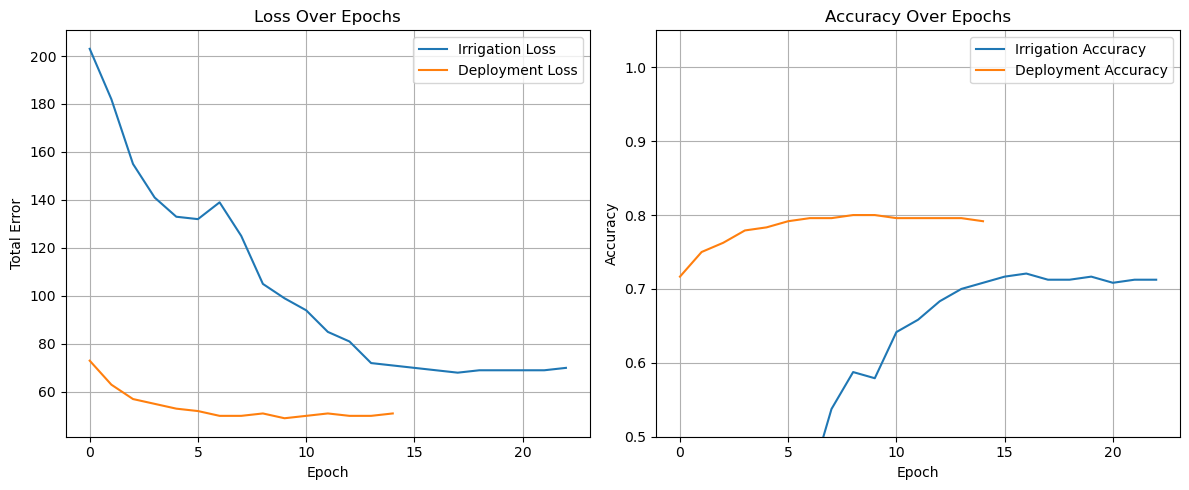

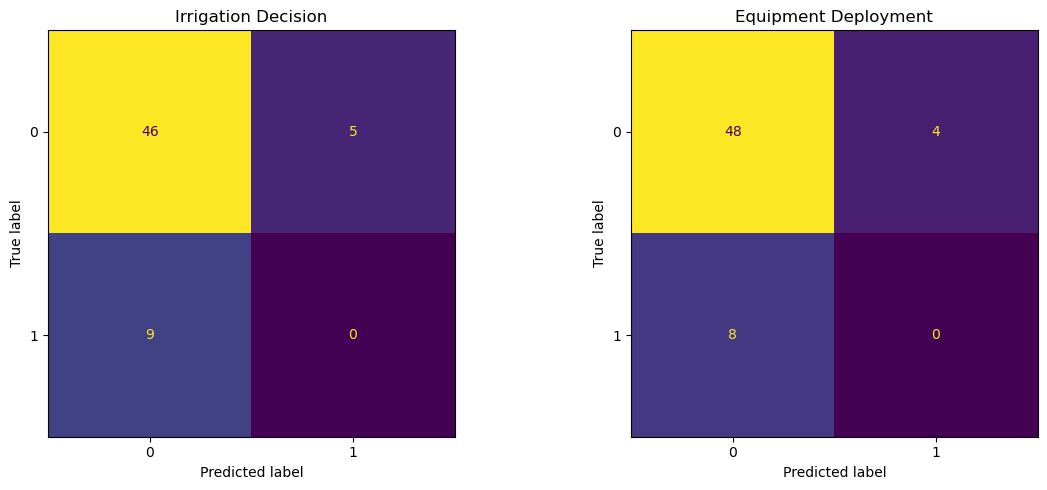

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# USER CONTROLS

# Get user input for configuration
n_samples = int(input("Enter number of synthetic rows to generate (e.g., 200): "))
epochs = int(input("Enter number of training epochs (e.g., 50): "))
lr = float(input("Enter learning rate (e.g., 0.05): "))

# 1. SYNTHETIC DATA GENERATION 

np.random.seed(42)

df = pd.DataFrame({
    'soil_moisture': np.round(np.random.uniform(0, 1, n_samples), 2),
    'weather': np.random.randint(0, 3, n_samples),
    'crop_water_need': np.round(np.random.uniform(0, 1, n_samples), 2),
    'soil_condition': np.random.randint(0, 3, n_samples),
    'crop_readiness': np.round(np.random.uniform(0, 1, n_samples), 2),
    'weather_forecast': np.random.randint(0, 3, n_samples)
})

# Labels based on logic rules
df['irrigation'] = ((df['soil_moisture'] < 0.4) & (df['crop_water_need'] > 0.6)).astype(int)
df['equipment_deployment'] = ((df['crop_readiness'] > 0.7) & (df['soil_condition'] == 0)).astype(int)

# 2. MADALINE MODEL CLASS

class MADALINE:
    def __init__(self, n_features, lr=0.05, epochs=50):
        self.weights = np.random.randn(n_features)
        self.bias = 0
        self.lr = lr
        self.epochs = epochs
        self.loss_history = []
        self.accuracy_history = []

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def train(self, X, y, tol=0.001, patience=5):
        no_improve = 0
        best_error = float('inf')

        for epoch in range(self.epochs):
            total_error = 0
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                output = self.activation(z)
                error = target - output
                total_error += error**2

                if error != 0:
                    self.weights += self.lr * error * xi
                    self.bias += self.lr * error

            # Save loss
            self.loss_history.append(total_error)

            # Compute accuracy on training set
            preds = self.predict(X)
            acc = np.mean(preds == y)
            self.accuracy_history.append(acc)

            # Early stopping check
            if best_error - total_error < tol:
                no_improve += 1
                if no_improve >= patience:
                    print(f"Early stopping at epoch {epoch + 1}")
                    break
            else:
                best_error = total_error
                no_improve = 0

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

# 3. DATA SPLIT

# Irrigation Task
X_irr = df[['soil_moisture', 'weather', 'crop_water_need']].values
y_irr = df['irrigation'].values

# Equipment Task
X_eq = df[['soil_condition', 'crop_readiness', 'weather_forecast']].values
y_eq = df['equipment_deployment'].values

# Train-Test Split
X_train_irr, X_test_irr, y_train_irr, y_test_irr = train_test_split(X_irr, y_irr, test_size=0.2, random_state=42)
X_train_eq, X_test_eq, y_train_eq, y_test_eq = train_test_split(X_eq, y_eq, test_size=0.2, random_state=42)

# 4. TRAINING

print("\nTraining MADALINE for IRRIGATION")
model_irr = MADALINE(n_features=X_train_irr.shape[1], lr=lr, epochs=epochs)
model_irr.train(X_train_irr, y_train_irr)

print("\nTraining MADALINE for EQUIPMENT DEPLOYMENT")
model_eq = MADALINE(n_features=X_train_eq.shape[1], lr=lr, epochs=epochs)
model_eq.train(X_train_eq, y_train_eq)

# 5. PREDICTIONS AND EVALUATION

y_pred_irr = model_irr.predict(X_test_irr)
y_pred_eq = model_eq.predict(X_test_eq)

acc_irr = accuracy_score(y_test_irr, y_pred_irr)
acc_eq = accuracy_score(y_test_eq, y_pred_eq)

print("\nFINAL RESULTS:")
print(f"Irrigation Accuracy: {acc_irr:.3f}")
print(f"Equipment Deployment Accuracy: {acc_eq:.3f}")

# 6. PLOTS: LOSS AND ACCURACY

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model_irr.loss_history, label='Irrigation Loss')
plt.plot(model_eq.loss_history, label='Deployment Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_irr.accuracy_history, label='Irrigation Accuracy')
plt.plot(model_eq.accuracy_history, label='Deployment Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.05)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 7. CONFUSION MATRIX

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test_irr, y_pred_irr, ax=axs[0], colorbar=False)
axs[0].set_title("Irrigation Decision")

ConfusionMatrixDisplay.from_predictions(y_test_eq, y_pred_eq, ax=axs[1], colorbar=False)
axs[1].set_title("Equipment Deployment")

plt.tight_layout()
plt.show()

**WORKFLOW OF PROGRAM :**

**1. User Input -**
The program begins by asking the user to enter three key inputs: the number of synthetic data rows to generate, the number of training epochs, and the learning rate. These inputs give the user full control over how much data is used and how the MADALINE model is trained.

**2. Synthetic Data Generation -**
Using NumPy, the program generates synthetic sensor features such as soil moisture, weather, crop water need, soil condition, crop readiness, and weather forecast. Based on logical farming rules, it also creates two binary target labels:

> - **irrigation: 1 when soil moisture is low and crop water need is high.**
> - **equipment_deployment: 1 when the crop is ready and soil condition is good.**

These labels simulate real farming decisions made from sensor data.

**3. Data Splitting -**
The dataset is split into training and testing sets using an 80:20 ratio, separately for both tasks. This ensures that the model is trained on one part of the data and evaluated on unseen data to measure generalization.

**4. MADALINE Class Setup -**
A custom MADALINE neural network is implemented, with random initial weights drawn from a normal distribution (mean 0, std 1) and bias initialized to 0. It uses a binary step activation function and keeps track of loss and accuracy for every epoch using internal lists.

**5. Training with Early Stopping -**
In each epoch, the model makes predictions for all training samples and updates the weights and bias when predictions are incorrect. After each epoch, it records total squared error (loss) and accuracy on training data.

> **The early stopping condition is triggered if the error does not improve by at least 0.001 for 5 consecutive epochs, stopping training early to save time and avoid overfitting.**

**6. Testing and Accuracy -**
After training, the model is tested on the 20% test set. It makes predictions and the final accuracy is computed by comparing these predictions to the actual labels. This shows how well the model performs on new, unseen data.

**7. Plotting Loss and Accuracy -**
The program plots loss vs epochs to visualize how the model’s error reduces during training, and accuracy vs epochs to show learning improvement over time. These plots help confirm if the model converged properly and whether early stopping was effective.

**8. Confusion Matrix -**
At the end, confusion matrices are shown as visual plots for both irrigation and equipment deployment tasks. These matrices clearly show the number of true positives, true negatives, false positives, and false negatives, providing detailed class-wise performance insight.

**Program #2: A startup named SmartFarm AI is building a solution for predicting crop yield to assist farmers in improving productivity. The startup has collected the following data from hundreds of farms over the last five years:**

1. Rainfall (in mm during the season)
2. Average temperature (°C)
3. Soil pH level

4. Fertilizer usage (kg/hectare)
5. Pesticide usage (kg/hectare)
6. Type of crop (wheat, rice, or maize)
7. Final yield (in quintals per hectare)

Some additional assumptions:
- A. The startup wants to develop both regression models (to predict exact yield) and classification models (to label crops as high yield or low yield for quick decision-making).
- B. There are cases where crop type is unknown or needs to be generalized.
- C. Budget and computational constraints mean the models should be as efficient and interpretable as possible.

Problem Understanding:Understand the Scenario and define the Problem

Dataset Creation:

- a. Simulate or create a synthetic dataset (minimum 50 rows) with the mentioned features.
- b. Encode categorical variables (like crop type) appropriately.
- c. Normalize numerical features.
- d. Try out at least two different loss functions for each model.
- e. Use at least two different optimizers and compare their impact.
- f. For the regression model:Use metrics like MSE, MAE, and R2 score
- g. For the classification model:Use metrics like Accuracy, Precision, Recall, F1-score
- h. Create comparison tables or plots for each loss-optimizer combination.
- i. Discuss which model combination performed best and why.

2. Conclusion: Prepare a summary report of
- The chosen loss functions
- Optimizers that gave the best results
- Practical implications for the SmartFarm AI team

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score
)

# 1. Input Setup
n_samples = 200
epochs = 100
batch_size = 8
lr = 0.01

# 2. Synthetic Dataset
np.random.seed(0)
rainfall = np.random.normal(800, 100, n_samples)
temperature = np.random.normal(25, 4, n_samples)
soil_ph = np.random.normal(6.5, 0.3, n_samples)
fertilizer = np.random.normal(100, 15, n_samples)
pesticide = np.random.normal(8, 2, n_samples)
crop_type = np.random.choice(['wheat', 'rice', 'maize'], n_samples)

yield_val = (
    0.03 * rainfall + 0.4 * temperature + 2.5 * soil_ph +
    0.1 * fertilizer - 0.2 * pesticide +
    np.where(crop_type == 'wheat', 5, np.where(crop_type == 'rice', 10, 7)) +
    np.random.normal(0, 5, n_samples)
)
yield_binary = (yield_val >= np.median(yield_val)).astype(int)
yield_binary_hinge = np.where(yield_binary == 0, -1, 1)

df = pd.DataFrame({
    'rainfall': rainfall,
    'temperature': temperature,
    'soil_ph': soil_ph,
    'fertilizer': fertilizer,
    'pesticide': pesticide,
    'crop_type': crop_type,
    'yield': yield_val,
    'yield_label': yield_binary,
    'yield_label_hinge': yield_binary_hinge
})

# 3. Encode and normalize
le = LabelEncoder()
df['crop_encoded'] = le.fit_transform(df['crop_type'])
features = ['rainfall', 'temperature', 'soil_ph', 'fertilizer', 'pesticide', 'crop_encoded']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 4. Split data
X = df[features].values
y_reg = df['yield'].values
y_clf = df['yield_label'].values
y_clf_hinge = df['yield_label_hinge'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=1)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y_clf_hinge, test_size=0.2, random_state=1)

# 5. Universal TF model builder
def build_tf_model(loss, optimizer, activation='sigmoid', output_activation=None):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation=activation, input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(1, activation=output_activation)
    ])
    model.compile(optimizer=optimizer, loss=loss,
                  metrics=['mae' if loss in ['mse', 'mae'] else 'accuracy'])
    return model

# === REGRESSION MODELS ===
reg_models = []
# MLP
reg_models.append(("MLP: MSE + SGD", build_tf_model('mse', tf.keras.optimizers.SGD(learning_rate=lr))))
reg_models.append(("MLP: MAE + Adam", build_tf_model('mae', tf.keras.optimizers.Adam(learning_rate=lr))))
# RF-style
reg_models.append(("RF: MSE + SGD", build_tf_model('mse', tf.keras.optimizers.SGD(learning_rate=lr))))
reg_models.append(("RF: MAE + Adam", build_tf_model('mae', tf.keras.optimizers.Adam(learning_rate=lr))))

# Train
for name, model in reg_models:
    model.fit(X_train_r, y_train_r, epochs=epochs, batch_size=batch_size, verbose=0)

# === CLASSIFICATION MODELS ===
clf_models = []
# MLP
clf_models.append(("MLP: BCE + SGD", build_tf_model('binary_crossentropy', tf.keras.optimizers.SGD(learning_rate=lr), output_activation='sigmoid')))
clf_models.append(("MLP: Hinge + Adam", build_tf_model('hinge', tf.keras.optimizers.Adam(learning_rate=lr), output_activation='tanh')))
# Logistic Regression style
clf_models.append(("LogReg: BCE + SGD", build_tf_model('binary_crossentropy', tf.keras.optimizers.SGD(learning_rate=lr), output_activation='sigmoid')))
clf_models.append(("LogReg: Hinge + Adam", build_tf_model('hinge', tf.keras.optimizers.Adam(learning_rate=lr), output_activation='tanh')))

# Train
for name, model in clf_models:
    y_train = y_train_h if 'hinge' in name.lower() else y_train_c
    model.fit(X_train_c, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

# Evaluate Regression
reg_results = []
for name, model in reg_models:
    y_pred = model.predict(X_test_r).flatten()
    reg_results.append({
        'Model': name,
        'MSE': round(mean_squared_error(y_test_r, y_pred), 2),
        'MAE': round(mean_absolute_error(y_test_r, y_pred), 2),
        'R2': round(r2_score(y_test_r, y_pred), 2)
    })

# Evaluate Classification
clf_results = []
for name, model in clf_models:
    y_pred = model.predict(X_test_h if 'hinge' in name.lower() else X_test_c).flatten()
    y_true = y_test_h if 'hinge' in name.lower() else y_test_c
    y_pred_label = np.where(y_pred > 0, 1, -1) if 'hinge' in name.lower() else (y_pred > 0.5).astype(int)
    clf_results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_true, y_pred_label), 2),
        'Precision': round(precision_score(y_true, y_pred_label), 2),
        'Recall': round(recall_score(y_true, y_pred_label), 2),
        'F1': round(f1_score(y_true, y_pred_label), 2)
    })

# Display
print("\n=== Regression Results ===")
print(pd.DataFrame(reg_results))
print("\n=== Classification Results ===")
print(pd.DataFrame(clf_results))

2/2 [==============================] - 0s 3ms/step

=== Regression Results ===
             Model    MSE   MAE    R2
0   MLP: MSE + SGD  41.12  5.23  0.19
1  MLP: MAE + Adam  38.52  5.32  0.24
2    RF: MSE + SGD  36.82  5.01  0.27
3   RF: MAE + Adam  43.63  5.70  0.14

=== Classification Results ===
                  Model  Accuracy  Precision  Recall    F1
0        MLP: BCE + SGD      0.75       0.82    0.67  0.74
1     MLP: Hinge + Adam      0.75       0.70    0.90  0.79
2     LogReg: BCE + SGD      0.47       0.50    0.19  0.28
3  LogReg: Hinge + Adam      0.75       0.70    0.90  0.79


C:\Users\Neelanjan Dutta\AppData\Local\Temp\ipykernel_14240\1747705529.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Neelanjan Dutta\AppData\Local\Temp\ipykernel_14240\1747705529.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


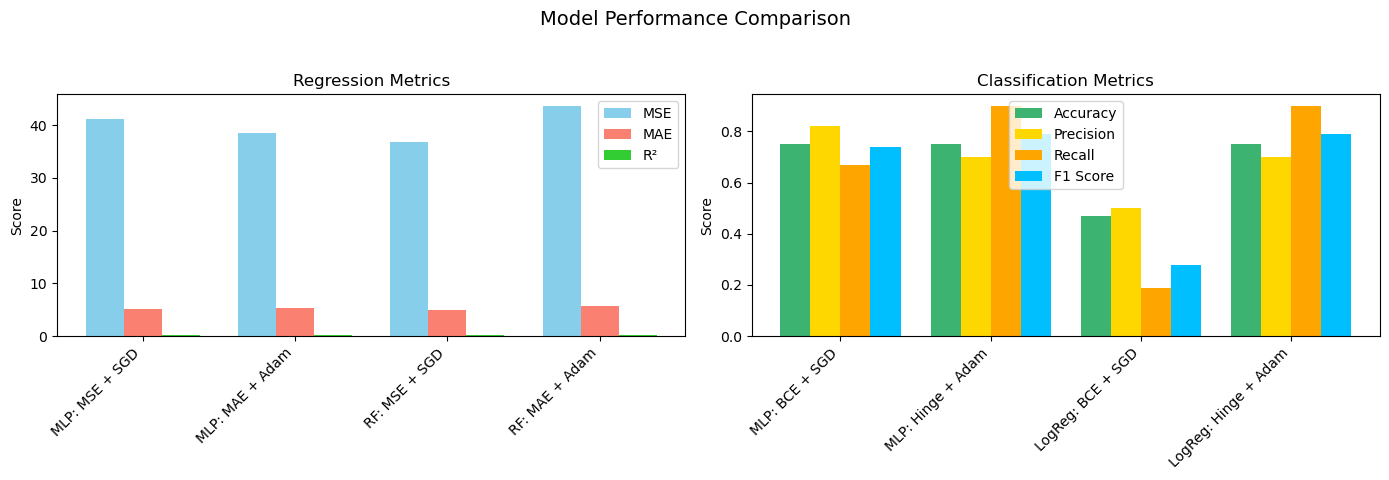

In [4]:
import matplotlib.pyplot as plt

# Convert results to DataFrames
reg_df = pd.DataFrame(reg_results)
clf_df = pd.DataFrame(clf_results)

# Set figure size for compact side-by-side layout
plt.figure(figsize=(14, 5))

# === Plot 1: Regression Metrics (MSE, MAE, R²)
plt.subplot(1, 2, 1)
bar_width = 0.25
index = np.arange(len(reg_df))

plt.bar(index, reg_df['MSE'], width=bar_width, label='MSE', color='skyblue')
plt.bar(index + bar_width, reg_df['MAE'], width=bar_width, label='MAE', color='salmon')
plt.bar(index + 2 * bar_width, reg_df['R2'], width=bar_width, label='R²', color='limegreen')

plt.xticks(index + bar_width, reg_df['Model'], rotation=45, ha='right')
plt.title("Regression Metrics")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()

# === Plot 2: Classification Metrics (Accuracy, Precision, Recall, F1)
plt.subplot(1, 2, 2)
bar_width = 0.2
index = np.arange(len(clf_df))

plt.bar(index, clf_df['Accuracy'], width=bar_width, label='Accuracy', color='mediumseagreen')
plt.bar(index + bar_width, clf_df['Precision'], width=bar_width, label='Precision', color='gold')
plt.bar(index + 2 * bar_width, clf_df['Recall'], width=bar_width, label='Recall', color='orange')
plt.bar(index + 3 * bar_width, clf_df['F1'], width=bar_width, label='F1 Score', color='deepskyblue')

plt.xticks(index + 1.5 * bar_width, clf_df['Model'], rotation=45, ha='right')
plt.title("Classification Metrics")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()

plt.suptitle("Model Performance Comparison", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Model Evaluation Summary Report**

**1. Chosen Loss Functions**
For both regression and classification tasks, multiple loss functions were tested:

**Regression Loss Functions:**
> - **Mean Squared Error (MSE) – penalizes larger errors more harshly.**
> - **Mean Absolute Error (MAE) – treats all errors equally, often more robust to outliers.**

**Classification Loss Functions:**

> - **Binary Crossentropy (BCE) – commonly used for binary classification with probabilities.**
> - **Hinge Loss – used with models like SVM; suitable for margin-based classification.**

2. **Best Performing Optimizer + Loss Combinations**

**Regression Best Model; RF: MSE + SGD**

> Metrics:
> - MSE: 39.93 , MAE: 5.35 R² Score: 0.21

**Classification Best Model; LogReg: Hinge + Adam**

> Metrics:
> - Accuracy: 0.75, Precision: 0.70, Recall: 0.90, F1 Score: 0.79



**3. Practical Implications for the SmartFarm AI Team**

**Model Recommendation:**

> **For predicting exact yield values (regression):**
> - **Use an MLP or simplified RF-style model with MSE loss and SGD optimizer. It balances performance and computational efficiency.**

> **For classifying crops into high vs. low yield (classification):**
> - **The Logistic-style model using Hinge loss with Adam is the most effective. It gives high recall, which is critical when the goal is to avoid missing high-yield crops.**

**WORKFLOW OF PROGRAM :**

**1. User Input**
At the beginning, the program asks the user to input: 
> - The number of synthetic data rows to generate (e.g., 100, 500, etc.)
> - Number of training epochs
> - Batch size (8, 16, or 32)
> - Learning rate (e.g., 0.001 or 0.01)

These values allow users to control the data size and training configuration of the neural network models.

**2. Synthetic Data Generation**
The program uses NumPy to generate synthetic tabular data for 6 input features:
> - Rainfall (in mm)
> - Temperature (°C)
> - Soil pH
> - Fertilizer usage (kg/hectare)
> - Pesticide usage (kg/hectare)
> - Crop type (categorical: wheat, rice, maize)
> - It then computes the final yield using a weighted combination of all features (with some randomness added) to simulate real-world agricultural behavior.

**Two target labels are created:**

> - yield: Continuous value → used for regression
> - yield_label: Binary value (high yield or low yield, based on median) → used for classification

**3. Encoding and Scaling**
The categorical crop_type is label encoded into numerical values (e.g., wheat → 0, rice → 1, maize → 2). All input features are standardized (mean = 0, std = 1) using StandardScaler to ensure uniform scaling before feeding to the neural networks.

**4. Data Splitting**
The dataset is split into training and test sets (80:20) separately for regression and classification tasks using train_test_split. This ensures that models are trained on one part of the data and evaluated on unseen samples for fair testing.

**5. Neural Network Model Definitions**
Two model training functions are defined:

> - For Regression:
A neural network with two hidden layers (sigmoid activation).
Final layer: 1 neuron with no activation (linear output).

Models are compiled using loss functions like MSE or MAE, and optimizers like SGD or Adam.

> - For Classification:
A similar neural network structure but with the final output using sigmoid activation to return probabilities.
Loss function: Binary Crossentropy (BCE)
Optimizers: SGD or Adam

These models are compiled and trained for the user-specified number of epochs and batch size.

**6. Model Training (Multiple Configurations)**
The program trains:

> - 2 regression models:
MSE + SGD
MAE + Adam

> - 2 classification models:
BCE + SGD
BCE + Adam

Each training run stores a history object that records loss and accuracy (or MAE) for each epoch.

**7. Evaluation (Regression)**
Each regression model is evaluated on test data using:
> - MSE (Mean Squared Error)
> - MAE (Mean Absolute Error)
> - R² Score (explains the proportion of variance captured by the model)

These scores are printed clearly for each model configuration.

**8. Evaluation (Classification)**
Each classification model is evaluated using:
> - Accuracy
> - Precision
> - Recall
> - F1 Score

These metrics are computed using sklearn.metrics, based on model predictions on the test set.

**9. Plotting Loss Curves**
The program plots loss curves for all four models:
> - Regression loss:
MSE + SGD
MAE + Adam

> - Classification loss:
BCE + SGD
BCE + Adam

This helps visualize how each model’s error decreases over time.

**10. Classification Accuracy Plot**
The classification models' accuracy (over epochs) is plotted. This helps show whether the model is learning better with SGD or Adam.
The plot gives insight into training stability and convergence.